<h1 style = "color : dodgerblue"> Diabetes Prediction </h1>

<h2 style = "color : deepskyblue"> Dataset </h2>

We'll use a publicly available dataset from Kaggle: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database  

<h2 style = "color : deepskyblue"> Importing Dataset </h2>

<h3 style = "color : royalblue"> 1. Importing Necessary Libraries </h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<h3 style = "color : royalblue"> 2. Importing the Dataset </h3>

In [2]:
# Loading the dataset from a CSV file
data = pd.read_csv('Dataset\diabetes.csv')

<h3 style = "color : royalblue"> 3. Exploring the Data </h3>

In [3]:
# top 5 rows of the data
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
# bottom 5 rows of the data
data.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [5]:
# The shape is the number of rows and columns of the DataFrame
# columns: 9
# rows: 768

data.shape

(768, 9)

In [6]:
# Get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Statistical summary
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

<h2 style = "color : deepskyblue"> EDA </h2>

<h3 style = "color : royalblue"> 1. Key Observations from Data </h3>

<b style = "color : orangered"> 1. Column Description: </b>

* Features include medical metrics like Pregnancies, Glucose, BloodPressure, etc.

* Outcome is the target variable: 1 indicates diabetes; 0 indicates no diabetes.

<b style = "color : orangered"> 2. Initial Insights: </b>

* Some features have minimum values of 0 (e.g., Glucose, BloodPressure, etc.), which is not biologically valid and likely represents missing data.

<h3 style = "color : royalblue"> 2. Checking for Missing Values </h3>

<h4 style = "color : salmon"> Missing Value Analysis </h4>

In [14]:
# Checking missing values
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<b style = "color : orangered"> Insights: </b>

* There are no explicit missing values (e.g., NaN).

* However, biologically unrealistic zeros indicate implicit missing values in columns like Glucose, BloodPressure, SkinThickness, Insulin, and BMI.

<h3 style = "color : royalblue"> 3. Univariate Analysis </h3>

<h4 style = "color : salmon"> Visualizing Distributions </h4>

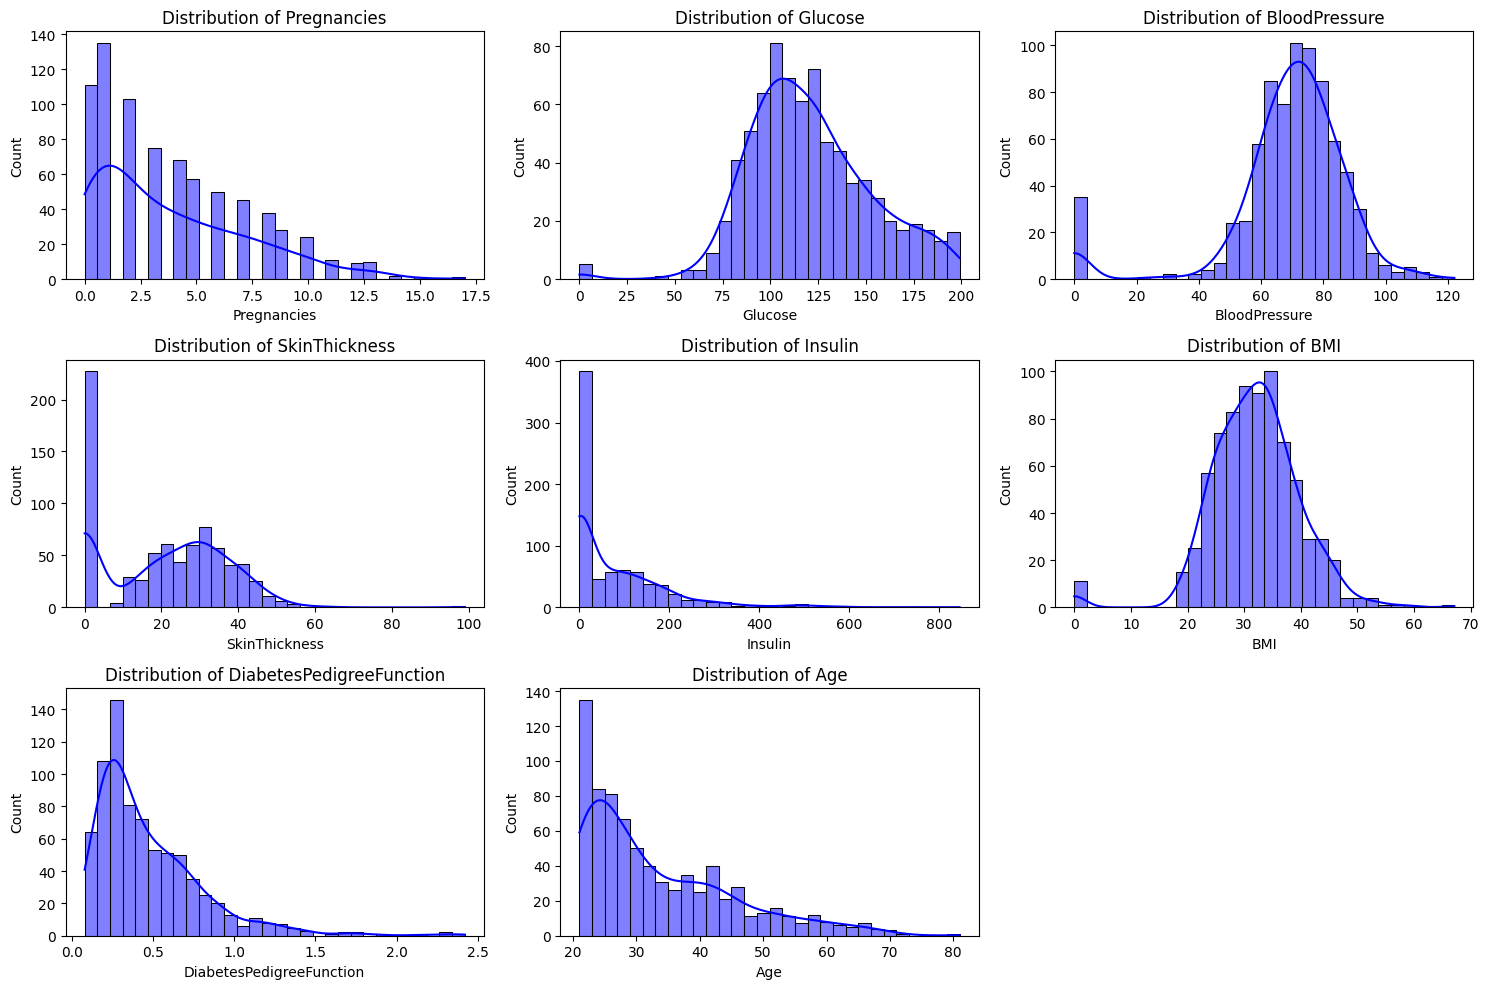

In [17]:
columns = data.columns[:-1]  # Exclude 'Outcome'
plt.figure(figsize = (15, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde = True, bins = 30, color = 'blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

<b style = "color : orangered"> Insights: </b>

<b style = "color : coral"> 1. Pregnancies: </b> Most values are clustered between 0 and 10, but some outliers exist.

<b style = "color : coral"> 2. Glucose: </b> A few instances of 0, suggesting missing data. Most values center around 120.

<b style = "color : coral"> 3. BloodPressure: </b> Several values are 0, indicating missing data.

<b style = "color : coral"> 4. Insulin: </b> Highly skewed, with many zeros.

<b style = "color : coral"> 5. BMI: </b> A near-normal distribution but with zeros, which aren't valid.

<b style = "color : coral"> 6. Outcome: </b> Class imbalance; more individuals without diabetes (Outcome=0).

<h3 style = "color : royalblue"> 4. Handling Missing Values </h3>

<h4 style = "color : salmon"> Replacing Zeros </h4>

<b style = "color : orangered"> If there are missing values, handle them: </b>
- <b>Imputation:</b> Fill missing values with mean, median, or mode.
- <b>Removal:</b> Remove rows or columns with missing values.

- <b>Example:</b> Impute missing values with the mean
- data.fillna(data.mean(), inplace=True)

In [18]:
# Replacing 0s with NaN in relevant columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)

In [20]:
# Checking the data
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [21]:
# Imputing missing values using median
data[columns_with_zeros] = data[columns_with_zeros].fillna(data[columns_with_zeros].median())

In [22]:
# Re-checking the data
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

<h3 style = "color : royalblue"> 5. Bivariate Analysis </h3>

<h4 style = "color : salmon"> Correlation Matrix </h4>

In [23]:
corr_matrix = data.corr()
corr_matrix

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.081770   
Glucose                      0.128213  1.000000       0.218937       0.192615   
BloodPressure                0.208615  0.218937       1.000000       0.191892   
SkinThickness                0.081770  0.192615       0.191892       1.000000   
Insulin                      0.025047  0.419451       0.045363       0.155610   
BMI                          0.021559  0.231049       0.281257       0.543205   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.102188   
Age                          0.544341  0.266909       0.324915       0.126107   
Outcome                      0.221898  0.492782       0.165723       0.214873   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.025047  0.021559                 -0.033523   
Glucose                   0.419451  0.231049                  0.137327   
BloodPressure             0.045363  0.281257                 -0.002378   
SkinThickness             0.155610  0.543205                  0.102188   
Insulin                   1.000000  0.180241                  0.126503   
BMI                       0.180241  1.000000                  0.153438   
DiabetesPedigreeFunction  0.126503  0.153438                  1.000000   
Age                       0.097101  0.025597                  0.033561   
Outcome                   0.203790  0.312038                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266909  0.492782  
BloodPressure             0.324915  0.165723  
SkinThickness             0.126107  0.214873  
Insulin                   0.097101  0.203790  
BMI                       0.025597  0.312038  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

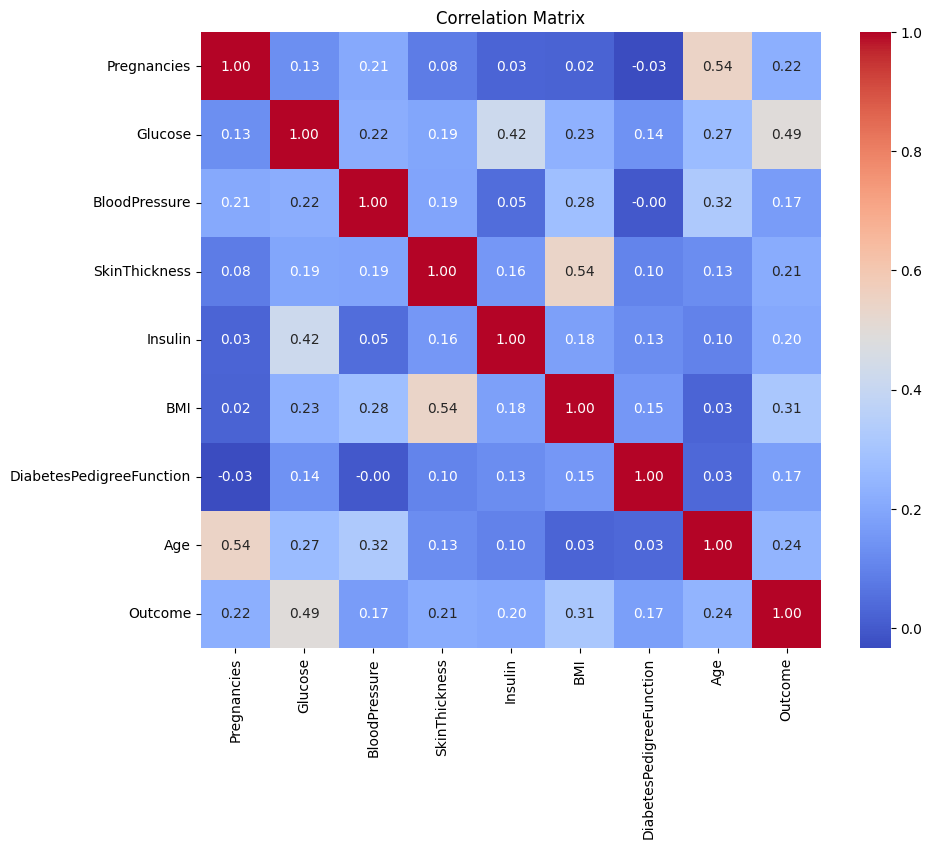

In [32]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

<b style = "color : orangered"> Insight: </b>

<b style = "color : coral"> 1. High Correlation: </b> 

* Glucose and Outcome (0.49): Higher glucose levels are associated with diabetes.

* BMI and Outcome (0.31): Obesity is a risk factor for diabetes.

<b style = "color : coral"> 2. Weak Correlations: </b>

* Features like BloodPressure and SkinThickness show weak correlations with Outcome.

<h3 style = "color : royalblue"> 6. Relationship with Outcome </h3>

<h4 style = "color : salmon"> Boxplots for Continuous Variables </h4>

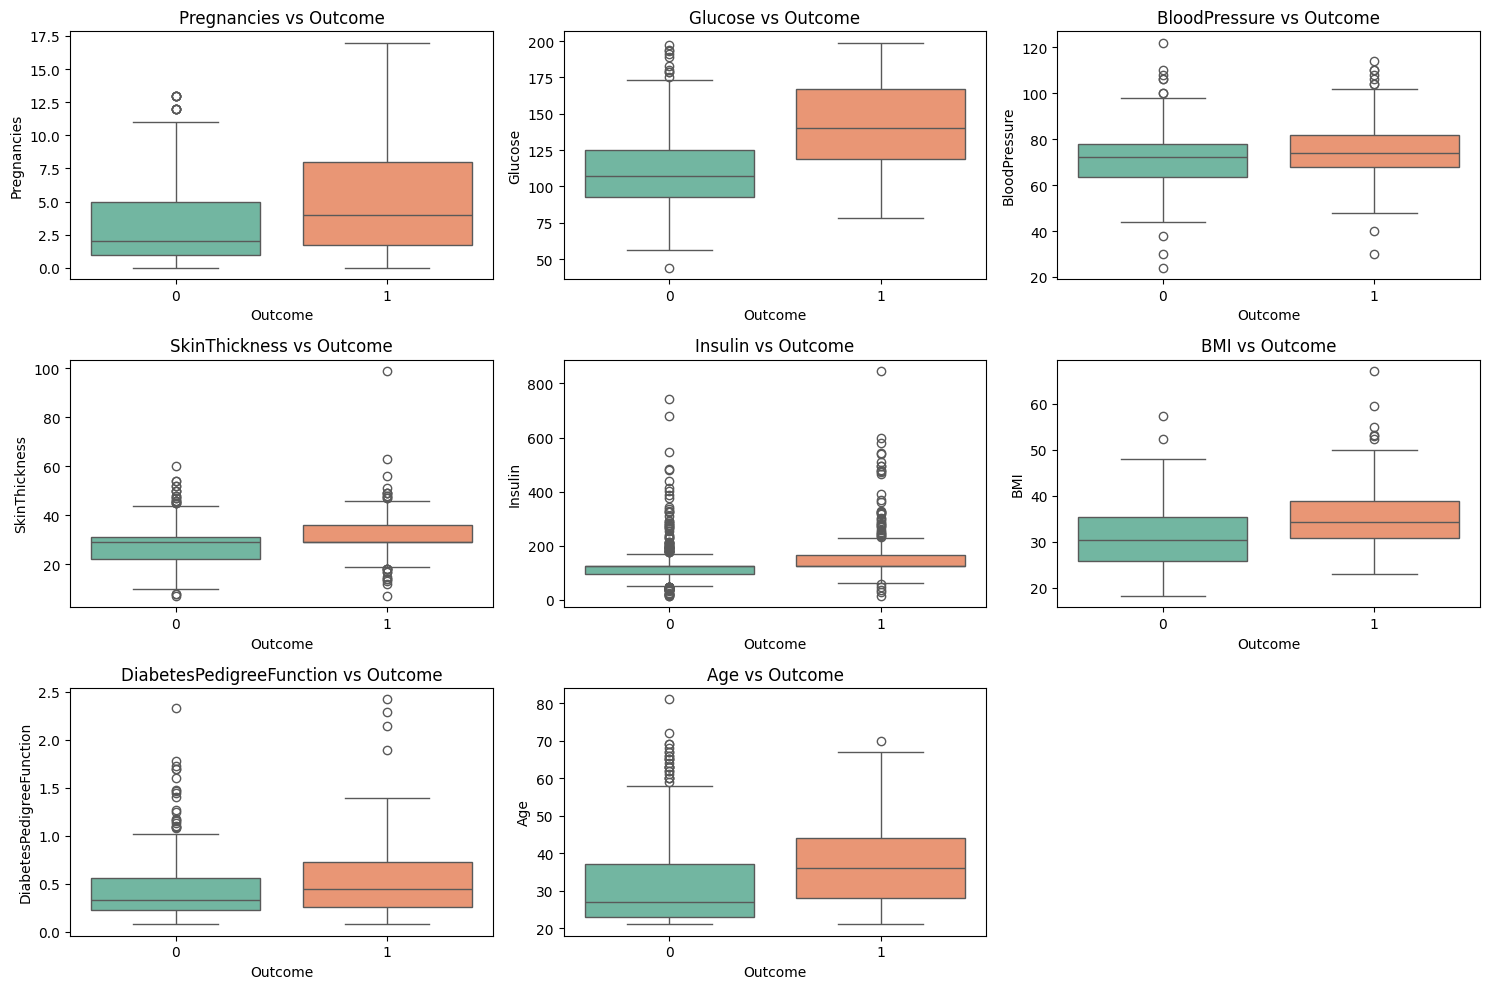

In [33]:
plt.figure(figsize = (15, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x = 'Outcome', y = col, data = data, palette = 'Set2')
    plt.title(f'{col} vs Outcome')
plt.tight_layout()
plt.show()

<b style = "color : orangered"> Insights: </b>

<b style = "color : coral"> 1. Glucose: </b> Significantly higher for diabetic patients.

<b style = "color : coral"> 2. BMI: </b> Higher among diabetic patients.

<b style = "color : coral"> 3. Insulin: </b> Higher in diabetic patients, but with outliers.

<b style = "color : coral"> 4. Pregnancies: </b> Slightly higher for diabetic patients, especially in the upper quantiles.

<h3 style = "color : royalblue"> 7. Outlier Analysis </h3>

<h4 style = "color : salmon"> Detecting Outliers </h4>

In [34]:
from scipy.stats import zscore

In [35]:
# Computing Z-scores
z_scores = data.apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print(outliers)

Pregnancies                  4
Glucose                      0
BloodPressure                8
SkinThickness                4
Insulin                     20
BMI                          5
DiabetesPedigreeFunction    11
Age                          5
Outcome                      0
dtype: int64


<b style = "color : orangered"> Insights: </b>

* Features like Insulin have a high number of outliers.

* While outliers may carry important information, extreme ones could affect model performance.

<h4 style = "color : salmon"> Handling Outliers </h4>

Outliers can be capped or removed based on domain knowledge:

In [37]:
for col in columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

<h3 style = "color : royalblue"> 8. Class Imbalance </h3>

<h4 style = "color : salmon"> Outcome Distribution </h4>

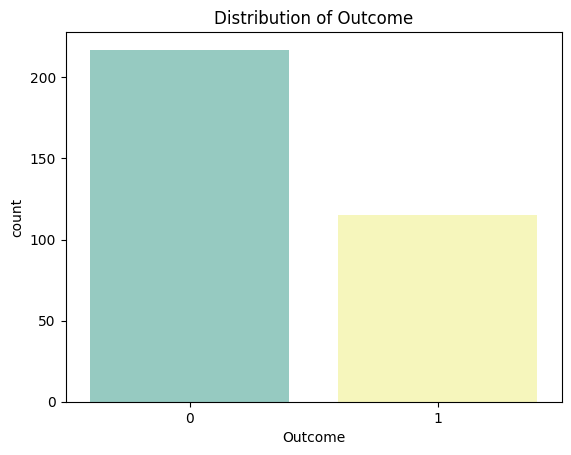

In [39]:
sns.countplot(x = 'Outcome', data = data, palette = 'Set3')
plt.title('Distribution of Outcome')
plt.show()

<b style = "color : orangered"> Insights: </b>

* The dataset has more non-diabetic patients than diabetic ones.

* A balanced dataset improves model performance.

<h3 style = "color : royalblue"> 8. Pair Plot </h3>

<h4 style = "color : salmon"> Scatter Matrix </h4>

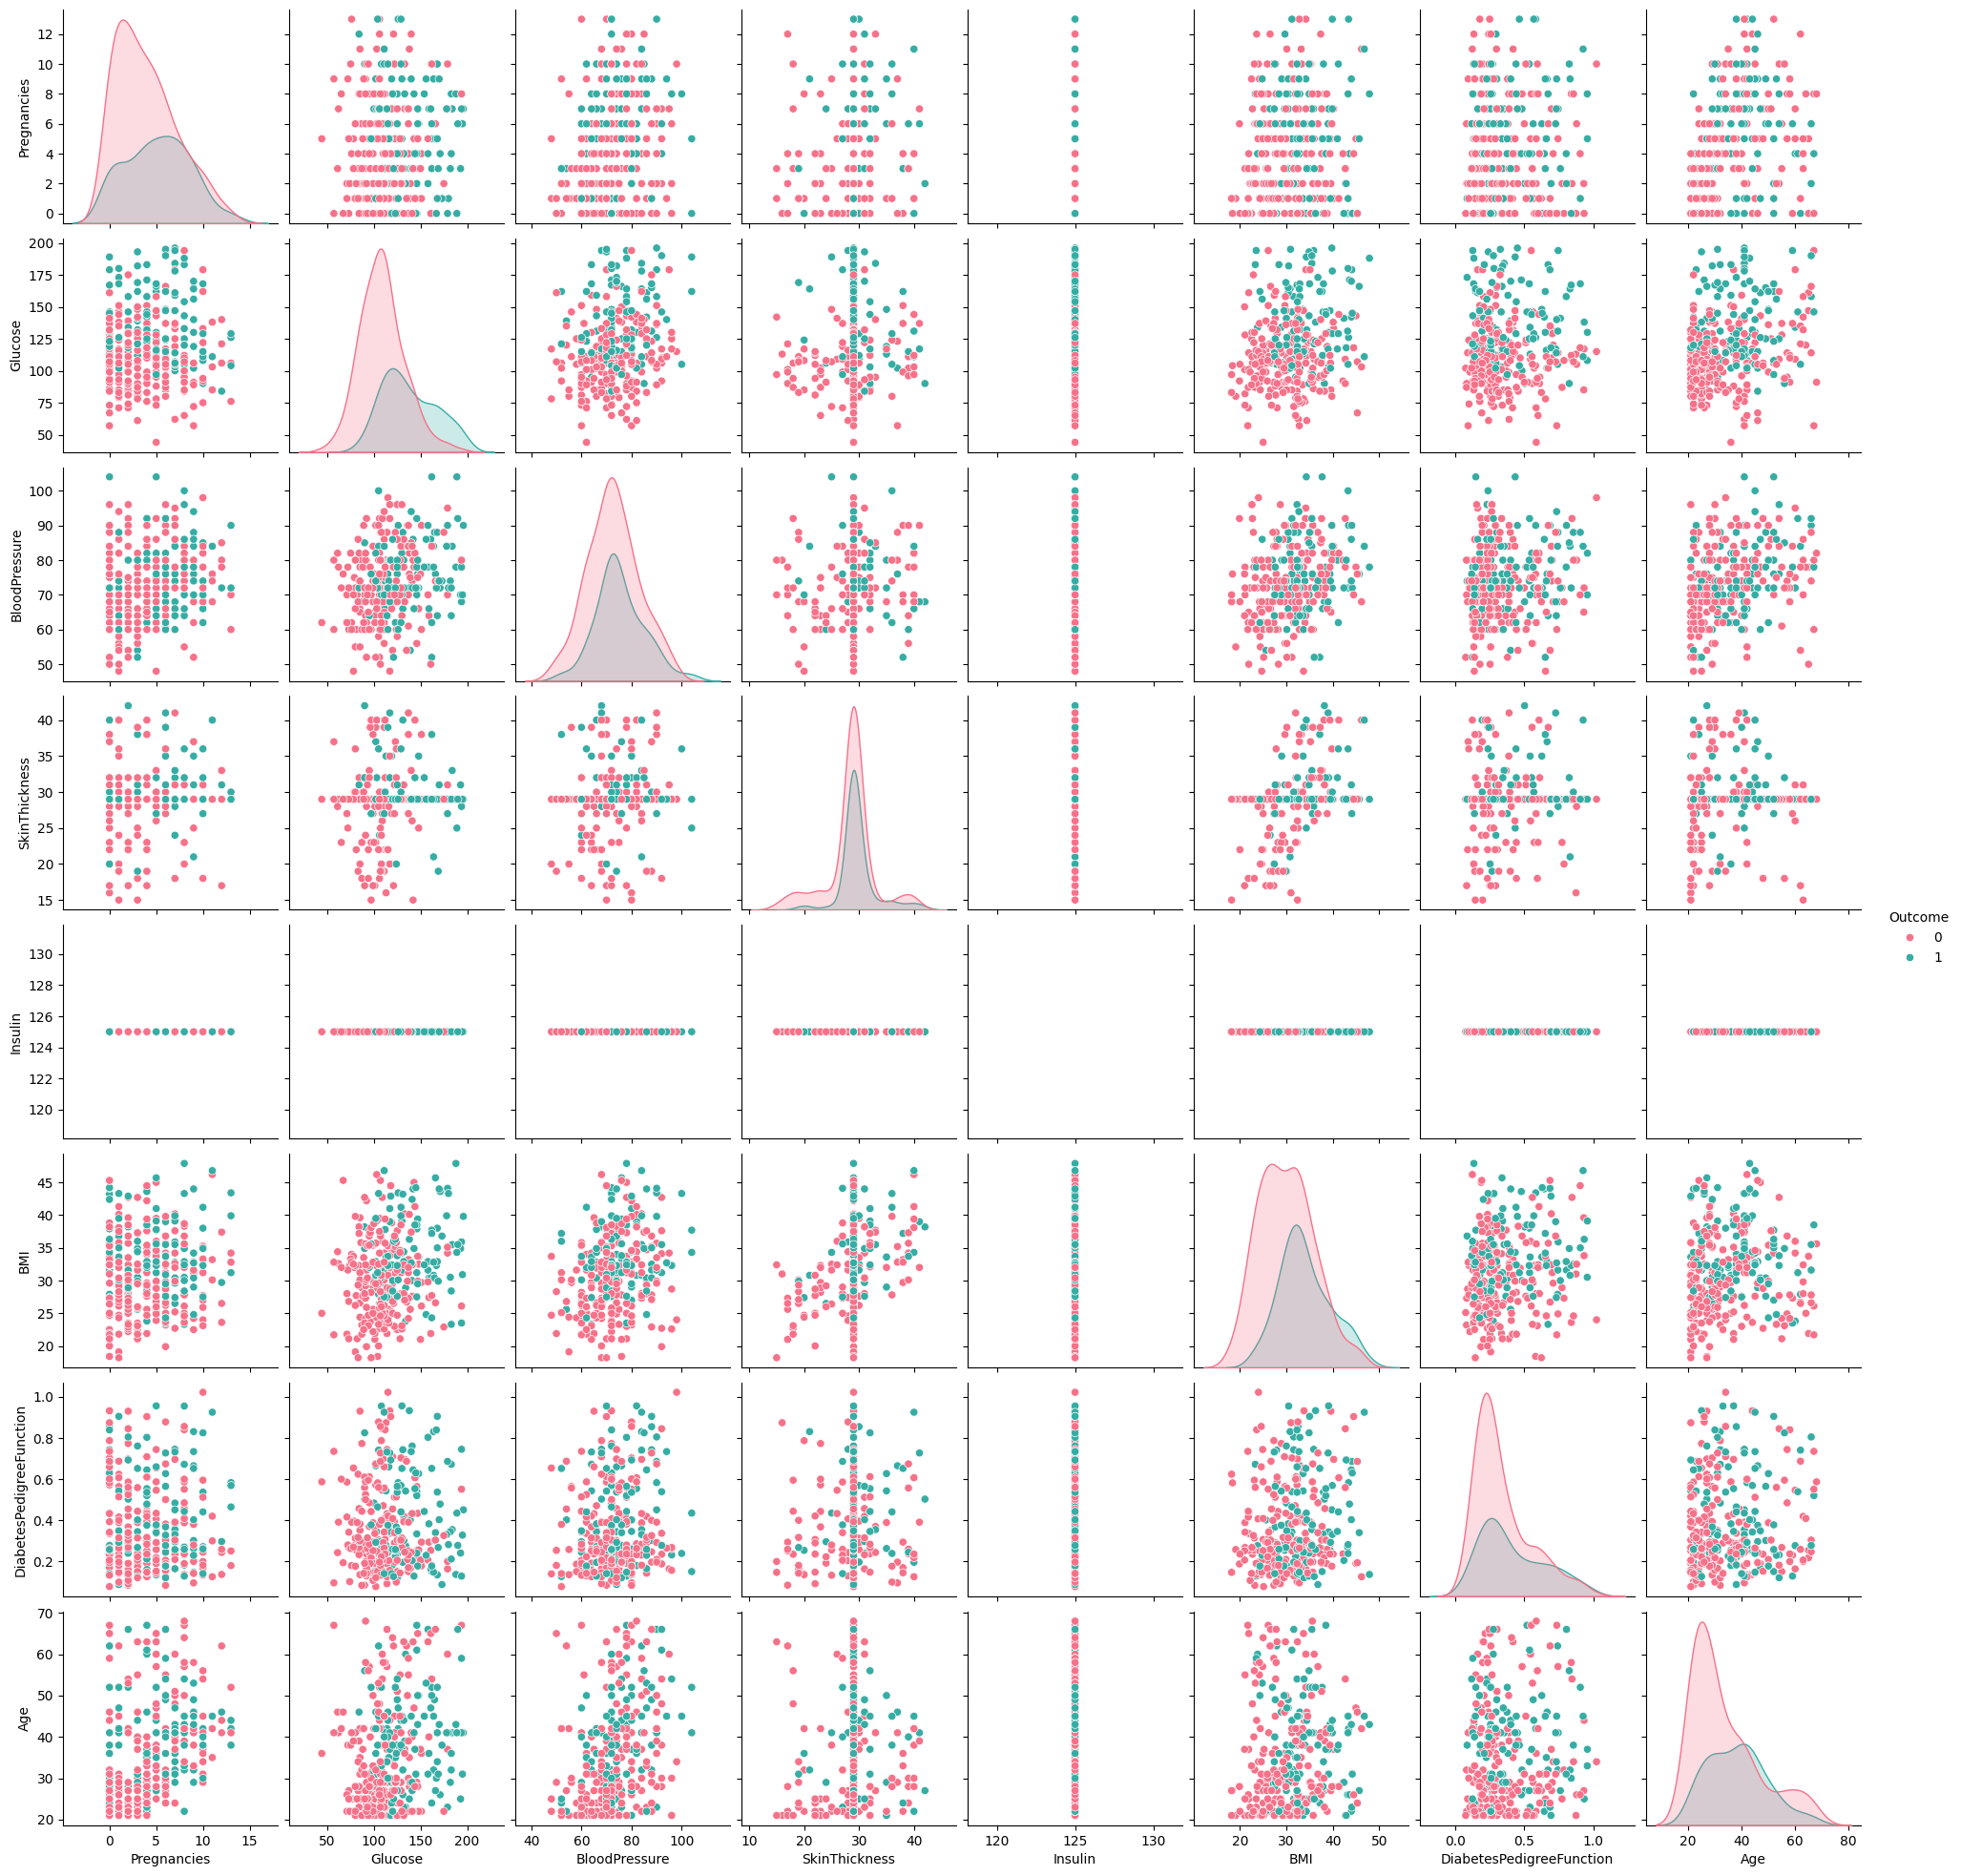

In [40]:
sns.pairplot(data, hue = 'Outcome', diag_kind = 'kde', palette = 'husl')
plt.show()

<b style = "color : orangered"> Insights: </b>

* Clear separation between diabetic and non-diabetic patients based on Glucose and BMI.

* Overlap in other features, like BloodPressure.

<h2 style = "color : deepskyblue"> Data Preprocessing </h2>

<h3 style = "color : royalblue"> 1. Feature Scaling </h3>

<h4 style = "color : salmon"> Why Scaling? </h4>

Features like Glucose, BMI, and Insulin have different ranges, which can impact model performance. Scaling ensures that all features contribute equally.

<h4 style = "color : DarkCyan"> Standardization </h4>

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
# Initializing the scaler
sc = StandardScaler()

# Seperating features and target 
X = data.drop('Outcome', axis = 1)
y = data['Outcome']

# Applying standard scaling
X_scaled = sc.fit_transform(X)

# Converting scaled data back to DataFrame for easier inspection
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [43]:
# printing X_scaled data
X_scaled.head()

Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin       BMI  \
0     0.490124  1.003027      -0.153355       1.439678      0.0  0.366217   
1    -1.005476 -1.158229      -0.740823       0.015726      0.0 -0.790311   
2     1.088364  2.203725      -0.936646       0.015726      0.0 -1.335532   
3     0.191004 -0.094754       0.042468       0.015726      0.0 -0.955530   
4     1.686604 -0.129060      -0.153355       0.015726      0.0  0.647089   

   DiabetesPedigreeFunction       Age  
0                  1.204203  1.186805  
1                 -0.077565 -0.355186  
2                  1.413186 -0.274028  
3                 -0.774177 -0.436343  
4                 -1.085331 -0.517501

<h3 style = "color : royalblue"> 2. Splitting the data </h3>

<h4 style = "color : salmon"> Train-Test Split </h4>

Split the dataset into training and testing sets for model evaluation.

In [44]:
from sklearn.model_selection import train_test_split

# stratify = y: Ensures that the train and test splits have the same proportion of classes as in the original dataset.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42, stratify = y)

In [46]:
# Verifying split
print(f'Training set: {X_train.shape}, Test set: {X_test.shape}')
print(f'\nTarget distribution in training set: \n{y_train.value_counts()}')
print(f'\nTarget distribution in test set: \n{y_test.value_counts()}')

Training set: (265, 8), Test set: (67, 8)

Target distribution in training set: 
Outcome
0    173
1     92
Name: count, dtype: int64

Target distribution in test set: 
Outcome
0    44
1    23
Name: count, dtype: int64


<h3 style = "color : royalblue"> 3. Balancing the dataset </h3>

Address class imbalance using SMOTE.

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
# Applying SMOTE to the training data
smote = SMOTE(random_state = 42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [51]:
# Verifying class distribution after balancing
print(y_train_balanced.value_counts())

Outcome
0    173
1    173
Name: count, dtype: int64


<h3 style = "color : royalblue"> 4. Final Verification </h3>

Ensure the processed data is ready for modeling.

In [52]:
# Checking dataset shapes
print(f'Final Training Set: {X_train_balanced.shape}, {y_train_balanced.shape}')
print(f'Final Test Set: {X_test.shape}, {y_test.shape}')

# Checking for missing values
print(X_train_balanced.isnull().sum().sum())
print(X_test.isnull().sum().sum())

Final Training Set: (346, 8), (346,)
Final Test Set: (67, 8), (67,)
0
0


<h2 style = "color : deepskyblue"> Model Implementation </h2>

<h3 style = "color : royalblue"> 1. Setup </h3>

* Load the preprocessed dataset and split it into training and testing sets.

* We'll reuse the previously processed data.

In [53]:
# X_train_balanced, y_train_balanced: preprocessed training data
# X_test, y_test: preprocessed testing data

print(f'Training Set Shape: {X_train_balanced.shape}')
print(f'Test Set Shape: {X_test.shape}')

Training Set Shape: (346, 8)
Test Set Shape: (67, 8)


<h3 style = "color : royalblue"> 2. Logistic Regression </h3>

Logistic regression predicts probabilities using a logistic function and is well-suited for binary classification.

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score

In [55]:
# Initializing and training the model
log_reg = LogisticRegression(random_state = 42)

log_reg.fit(X_train_balanced, y_train_balanced)

LogisticRegression(random_state=42)

In [56]:
# Predictions
# The predict_proba method returns an array of probability estimates for each class.
# The [:, 1] selects the probabilities of the positive class (typically represented by 1)
# y_pred_prob contains the predicted probabilities of the positive class (class 1) for each observation in X_test

y_pred = log_reg.predict(X_test)

y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

In [58]:
# Evaluation

print("Logistic Regression Classification Report: ")
print(classification_report(y_test, y_pred))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_prob)}")

Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        44
           1       0.68      0.74      0.71        23

    accuracy                           0.79        67
   macro avg       0.77      0.78      0.77        67
weighted avg       0.80      0.79      0.79        67


ROC-AUC Score: 0.8893280632411067


<b style = "color : orangered"> Insights </h3>

* Logistic regression is a baseline model for binary classification.

* Metrics like accuracy, precision, recall, and AUC-ROC can be used to evaluate its performance.

<h3 style = "color : royalblue"> 3. Linear Regression </h3>

Linear regression isn't ideal for binary classification but can be used as an experiment.

In [72]:
from sklearn.linear_model import LinearRegression

# Initializing and training the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_balanced, y_train_balanced)

# Predictions (round predictions to classify)
y_pred_lin = (lin_reg.predict(X_test) >= 0.5).astype(int)
y_pred_prob_lin = lin_reg.predict(X_test)

# Evaluation
print("Linear Regression Classification Report:")
print(classification_report(y_test, y_pred_lin))

Linear Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        44
           1       0.69      0.78      0.73        23

    accuracy                           0.81        67
   macro avg       0.79      0.80      0.79        67
weighted avg       0.81      0.81      0.81        67



<b style = "color : orangered"> Insights </h3>

* Linear regression may perform poorly for classification due to its sensitivity to outliers and inability to capture non-linear relationships.

<h3 style = "color : royalblue"> 4. Ridge Regression </h3>

Ridge regression is a linear model with L2 regularization to penalize large coefficients.

In [73]:
from sklearn.linear_model import Ridge

# Initializing and training the model
ridge_reg = Ridge(alpha = 1.0, random_state = 42)
ridge_reg.fit(X_train_balanced, y_train_balanced)

# Predictions (round predictions to classify)
y_pred_ridge = (ridge_reg.predict(X_test) >= 0.5).astype(int)
y_pred_prob_ridge = ridge_reg.predict(X_test)

# Evaluation
print("Ridge Regression Classification Report:")
print(classification_report(y_test, y_pred_ridge))

Ridge Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        44
           1       0.69      0.78      0.73        23

    accuracy                           0.81        67
   macro avg       0.79      0.80      0.79        67
weighted avg       0.81      0.81      0.81        67



<b style = "color : orangered"> Insights </h3>

* Ridge regression can improve generalization by reducing overfitting.

* Not typically used for classification but demonstrates regularization's impact.

<h3 style = "color : royalblue"> 5. Lasso Regression </h3>

Lasso regression applies L1 regularization, promoting sparsity by shrinking coefficients of less important features to zero.

In [74]:
from sklearn.linear_model import Lasso

# Initializing and training the model
lasso_reg = Lasso(alpha=0.01, random_state=42)
lasso_reg.fit(X_train_balanced, y_train_balanced)

# Predictions (adapted for classification)
y_pred_lasso = (lasso_reg.predict(X_test) >= 0.5).astype(int)
y_pred_prob_lasso = lasso_reg.predict(X_test)

# Evaluation
print("Lasso Regression Classification Report:")
print(classification_report(y_test, y_pred_lasso))

Lasso Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        44
           1       0.68      0.74      0.71        23

    accuracy                           0.79        67
   macro avg       0.77      0.78      0.77        67
weighted avg       0.80      0.79      0.79        67



<b style = "color : orangered"> Insights </h3>

* Lasso regression can perform feature selection by eliminating unimportant features.

* The choice of alpha determines the strength of regularization.

<h3 style = "color : royalblue"> 6. Polynomial Regression </h3>

Polynomial regression captures non-linear relationships by transforming features.

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generating polynomial features
poly_model = make_pipeline(PolynomialFeatures(degree=2), LogisticRegression(random_state=42))
poly_model.fit(X_train_balanced, y_train_balanced)

# Predictions
y_pred_poly = poly_model.predict(X_test)
y_pred_prob_poly = poly_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Polynomial Regression Classification Report:")
print(classification_report(y_test, y_pred_poly))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_prob_poly)}")


Polynomial Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.79        44
           1       0.59      0.70      0.64        23

    accuracy                           0.73        67
   macro avg       0.71      0.72      0.71        67
weighted avg       0.75      0.73      0.74        67


ROC-AUC Score: 0.8448616600790513


<b style = "color : orangered"> Insights </h3>

* Polynomial regression can model non-linear relationships but may risk overfitting with high-degree polynomials.

<h3 style = "color : royalblue"> 7. Elastic Net Regression </h3>

Elastic Net combines L1 (lasso) and L2 (ridge) regularization.

In [75]:
from sklearn.linear_model import ElasticNet

# Initialize and train the model
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train_balanced, y_train_balanced)

# Predictions (adapted for classification)
y_pred_elastic = (elastic_net.predict(X_test) >= 0.5).astype(int)
y_pred_prob_elastic = elastic_net.predict(X_test)

# Evaluation
print("Elastic Net Regression Classification Report:")
print(classification_report(y_test, y_pred_elastic))

Elastic Net Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        44
           1       0.68      0.74      0.71        23

    accuracy                           0.79        67
   macro avg       0.77      0.78      0.77        67
weighted avg       0.80      0.79      0.79        67



<b style = "color : orangered"> Insights </h3>

* Elastic Net balances feature selection (L1) and generalization (L2).

* Useful for datasets with multicollinearity and sparsity.

<h3 style = "color : royalblue"> 8. Comparing Models </h3>

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initializing a dictionary to store the results
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "ROC-AUC": []
}

In [68]:
# function to evaluate a model's predictions and updates the results dictionary

def evaluate_model(name, y_test, y_pred, y_pred_prob):
    results["Model"].append(name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision"].append(precision_score(y_test, y_pred))
    results["Recall"].append(recall_score(y_test, y_pred))
    results["F1-Score"].append(f1_score(y_test, y_pred))
    results["ROC-AUC"].append(roc_auc_score(y_test, y_pred_prob))

In [76]:
# Evaluating Each Model

# Logistic Regression
evaluate_model("Logistic Regression", y_test, y_pred, y_pred_prob)

# Linear Regression
evaluate_model("Linear Regression", y_test, y_pred_lin, y_pred_prob_lin)

# Ridge Regression
evaluate_model("Ridge Regression", y_test, y_pred_ridge, y_pred_prob_ridge)

# Lasso Regression
evaluate_model("Lasso Regression", y_test, y_pred_lasso, y_pred_prob_lasso)

# Polynomial Regression
evaluate_model("Polynomial Regression", y_test, y_pred_poly, y_pred_prob_poly)

# Elastic Net Regression
evaluate_model("Elastic Net Regression", y_test, y_pred_elastic, y_pred_prob_elastic)

In [79]:
# Displaying the Results

# Converting results to a DataFrame
results_df = pd.DataFrame(results)

# Displaying results
print(results_df)

                    Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0     Logistic Regression  0.791045   0.680000  0.739130  0.708333  0.889328
1     Logistic Regression  0.791045   0.680000  0.739130  0.708333  0.889328
2       Linear Regression  0.805970   0.692308  0.782609  0.734694  0.891304
3        Ridge Regression  0.805970   0.692308  0.782609  0.734694  0.891304
4        Lasso Regression  0.791045   0.680000  0.739130  0.708333  0.892292
5   Polynomial Regression  0.731343   0.592593  0.695652  0.640000  0.844862
6  Elastic Net Regression  0.791045   0.680000  0.739130  0.708333  0.893281


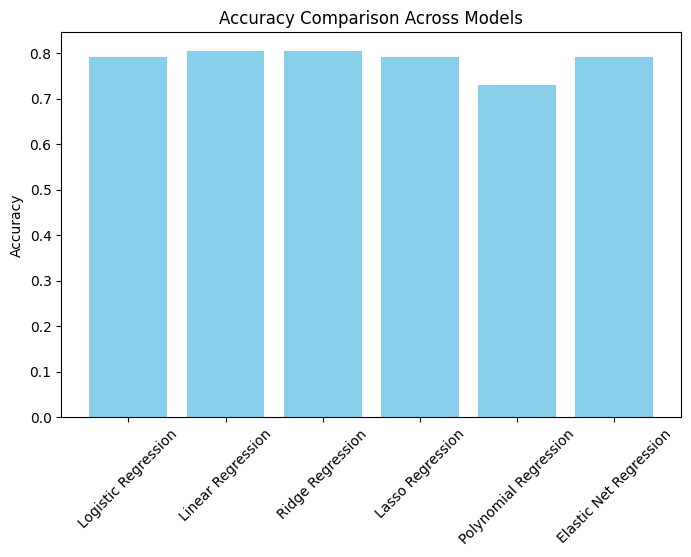

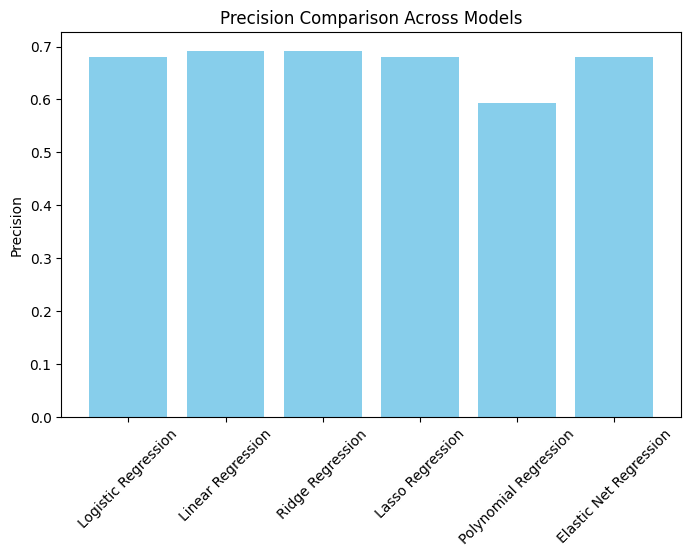

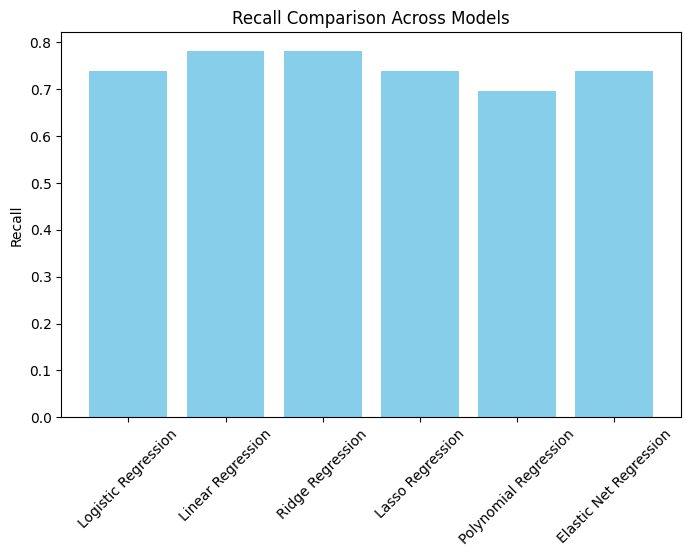

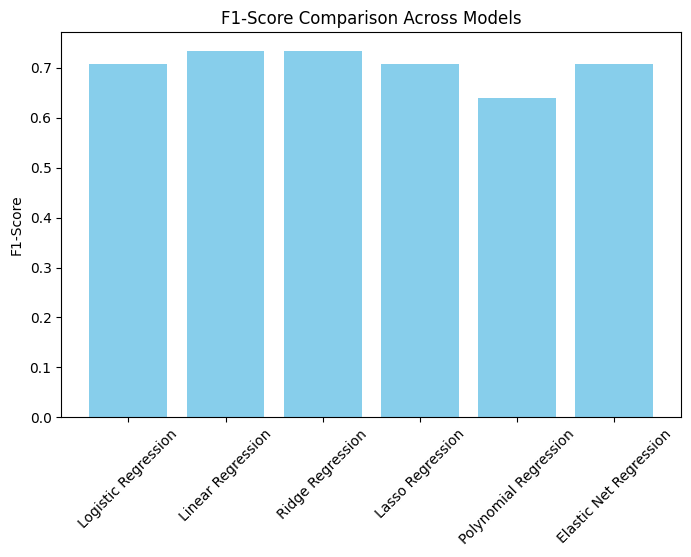

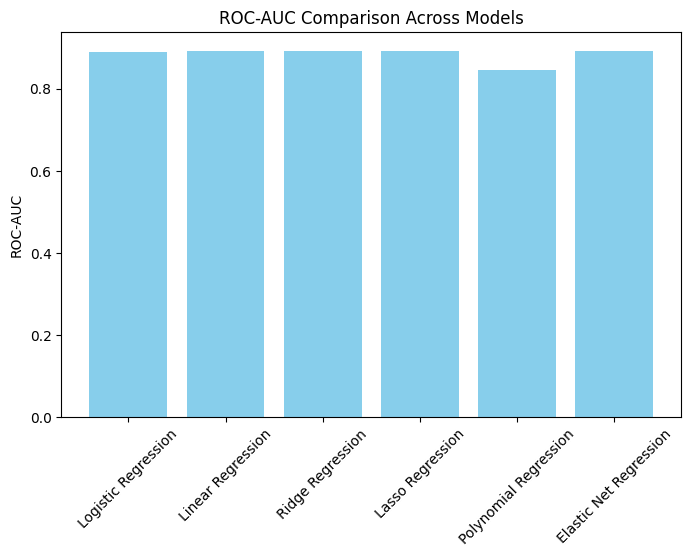

In [82]:
# Visualizing the comaprision

# Plot comparison
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]

for metric in metrics:
    plt.figure(figsize=(8, 5))
    plt.bar(results_df["Model"], results_df[metric], color = 'skyblue')
    plt.title(f'{metric} Comparison Across Models')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()

<b style = "color : orangered"> Conclusion <b>

1. Logistic Regression is often the best baseline for classification.

2. Polynomial Regression may outperform others in non-linear datasets but risks overfitting.

3. Regularization (Ridge, Lasso, Elastic Net) helps prevent overfitting.

<h2 style = "color : deepskyblue"> Model Deployment </h2>

<h3 style = "color : royalblue"> 1. Selecting the best model </h3>

<b style = "color : orangered; font-size : 20px"> Logistic Regression was the best-performing model based on the evaluation results. </b>

<h3 style = "color : royalblue"> 2. Saving the model </h3>

Use joblib or pickle to save the trained model for deployment.

In [83]:
import joblib

# Saving the trained Logistic Regression model
joblib.dump(log_reg, 'best_model.pkl')

# Saving the scaler for preprocessing
joblib.dump(sc, 'scaler.pkl')

print("Model and scaler saved!")

Model and scaler saved!


<h3 style = "color : royalblue"> 3. Creating a Deployment Script </h3>

This script allows us to load the saved model, preprocess new data, and make predictions.

In [84]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
5            5    116.0           74.0           29.0    125.0  25.6   
7           10    115.0           72.0           29.0    125.0  35.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
5                     0.201   30        0  
7                     0.134   29        0

In [87]:
# Load the saved model and scaler
model = joblib.load('best_model.pkl')
scaler = joblib.load('scaler.pkl')



# Define a function for prediction
def predict_diabetes(input_data):
    """
    Predicts diabetes outcome based on input features.
    Args:
        input_data (list or array): Input features in the same order as the dataset.
    
    Returns:
        int: Predicted class (0 or 1)
        float: Predicted probability
    """
    # Ensure correct input feature count
    if len(input_data) != 8:
        raise ValueError(f"Expected 8 features, but got {len(input_data)} features. "
                         "Please provide values for all features: "
                         "[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, "
                         "DiabetesPedigreeFunction, Age]")
    
    # Convert input data to a numpy array and reshape
    input_array = np.array(input_data).reshape(1, -1)
    
    # Scale the input features
    scaled_data = scaler.transform(input_array)
    
    # Predict outcome
    prediction = model.predict(scaled_data)[0]
    prediction_prob = model.predict_proba(scaled_data)[0, 1]
    
    return int(prediction), round(prediction_prob, 2)

In [86]:
example_input = [1, 85, 66, 29, 125, 26.6, 0.351, 31]
outcome, probability = predict_diabetes(example_input)
print(f"Prediction: {'Diabetic' if outcome == 1 else 'Non-Diabetic'}, Probability: {probability}")

Prediction: Non-Diabetic, Probability: 0.09


In [88]:
example_input = [6, 148, 72, 35, 125, 33.6, 0.627, 50]
outcome, probability = predict_diabetes(example_input)
print(f"Prediction: {'Diabetic' if outcome == 1 else 'Non-Diabetic'}, Probability: {probability}")

Prediction: Diabetic, Probability: 0.89
